<a href="https://colab.research.google.com/github/hassanali-1999/project/blob/main/6_Weekly_Project%20(Time_Series_Forecasting_Practical_Evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time Series Forecasting Exam

In this exam, you will work on a time series forecasting task. The goal is to go through the entire workflow from loading the data to evaluating the model and making predictions. Follow each step carefully. The dataset is stored in you can access it [here](https://www.kaggle.com/datasets/khaledzsa/traffic-dataset), the target is to predict `traffic_volume` column. There is also command to download the dataset below.

## Dataset: Traffic Dataset

### Dataset Overview:

- **Name**: Traffic Dataset
- **Description**: This dataset contains hourly data on the traffic volume for westbound I-94, a major interstate highway in the US that connects Minneapolis and St Paul, Minnesota. The data was collected by the Minnesota Department of Transportation (MnDOT) from 2012 to 2018 at a station roughly midway between the two cities.
- **Time Period**: Starting from 18-11-2016
- **Frequency**: Hourly observations

### Features:

1. **temp:** a numeric variable that shows the average temperature in kelvin.
2. **rain_1h:** a numeric variable that shows the amount of rain in mm that occurred in the hour.
3. **snow_1h:** a numeric variable that shows the amount of snow in mm that occurred in the hour.
4. **clouds_all:** a numeric variable that shows the percentage of cloud cover.
5. **weather_main:** a categorical variable that gives a short textual description of the current weather (such as Clear, Clouds, Rain, etc.).
6. **weather_description:** a categorical variable that gives a longer textual description of the current weather (such as light rain, overcast clouds, etc.).
7. **date_time:** a datetime variable that shows the hour of the data collected in local CST time.
8. **traffic_volume:** a numeric variable that shows the hourly I-94 reported westbound traffic volume.

#### Feel free to add or rearrange steps as you see fit to optimize your workflow. One additional note: the model's performance doesn't need to be 100% accurate. Instead, focus on achieving the best possible results while balancing performance and generalization.

## Load the Data

Load the time series dataset into a pandas DataFrame.

**Instructions:**
- Use `pandas` to load your dataset.
- Display the first few rows to understand its structure.
- Make sure the datetime column is correctly parsed.

In [113]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU
from keras.optimizers import SGD
import math
from sklearn.metrics import mean_squared_error


In [114]:
data = pd.read_csv('/content/Traffic Data.csv', parse_dates=['date_time'])
data.head()


,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time
0,1209.0,291.15,0.0,0.0,90,Mist,mist,2017-08-27 01:00:00
1,1248.0,286.01,0.0,0.0,1,Clear,sky is clear,2018-09-06 23:00:00
2,4602.0,293.69,0.0,0.0,75,Clouds,broken clouds,2017-08-25 18:00:00
3,2838.0,262.35,0.0,0.0,1,Clear,sky is clear,2017-11-09 22:00:00
4,5794.0,267.08,0.0,0.0,5,Clear,sky is clear,2017-11-09 15:00:00


In [115]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   traffic_volume       19980 non-null  float64       
 1   temp                 20000 non-null  float64       
 2   rain_1h              20000 non-null  float64       
 3   snow_1h              20000 non-null  float64       
 4   clouds_all           20000 non-null  int64         
 5   weather_main         20000 non-null  object        
 6   weather_description  20000 non-null  object        
 7   date_time            20000 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(4), int64(1), object(2)
memory usage: 1.2+ MB


## Exploratory Data Analysis (EDA)

Perform exploratory data analysis on the dataset.

**Instructions:**
- Plot the time series data.
- Analyze trends, seasonality, and potential outliers.
- Plot boxplots or scatter plots to identify any outliers or anomalies in the data.
- Seasonal Decomposition: Use `seasonal_decompose` from the `statsmodels` library to break down the time series data into trend, seasonality, and residual components. Analyze each component to gain insights into the long-term movement (trend), regular patterns (seasonality), and remaining fluctuations (residuals).

Do more if needed!

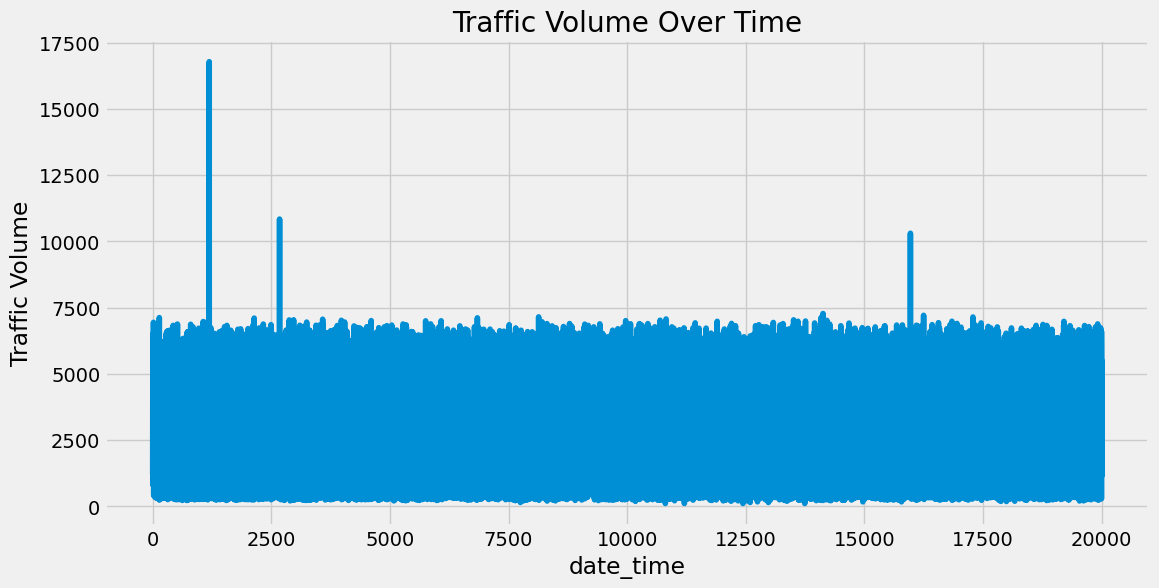

In [116]:
plt.figure(figsize=(12,6))
plt.plot(data['traffic_volume'])
plt.title('Traffic Volume Over Time')
plt.xlabel('date_time')
plt.ylabel('Traffic Volume')
plt.show()

In [117]:
data.describe()

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,date_time
count,19980.000000,20000.000000,20000.000000,20000.0,20000.000000,20000
mean,3278.186887,281.162680,0.048396,0.0,49.384600,2017-10-22 04:13:17.939999744
min,113.000000,243.390000,0.000000,0.0,0.000000,2016-11-18 15:00:00
25%,1228.750000,271.950000,0.000000,0.0,1.000000,2017-04-30 14:45:00
50%,3430.000000,281.825000,0.000000,0.0,75.000000,2017-10-21 07:30:00
75%,4928.000000,291.840000,0.000000,0.0,90.000000,2018-04-13 21:00:00
max,16781.000000,310.070000,10.600000,0.0,92.000000,2018-09-30 23:00:00
std,1977.171357,12.661288,0.398007,0.0,39.647341,NaN


In [118]:
data.isna().sum()

,0
traffic_volume,20
temp,0
rain_1h,0
snow_1h,0
clouds_all,0
weather_main,0
weather_description,0
date_time,0


In [119]:
data.duplicated().sum()

12

## Data Preprocessing

Clean and preprocess the data.

**Instructions:**
- Handle any missing values in the dataset.
- If necessary, resample the data to ensure consistent time intervals.
- Create any additional features needed, such as lags or moving averages.
- Make sure that the dates are sorted correctly.

Do more if needed!

In [120]:
data.isnull().sum()

,0
traffic_volume,20
temp,0
rain_1h,0
snow_1h,0
clouds_all,0
weather_main,0
weather_description,0
date_time,0


In [121]:
numeric_data = data.select_dtypes(include=['number']).columns
data[numeric_data] = data[numeric_data].fillna(data[numeric_data].mean())

data.isnull().sum()


,0
traffic_volume,0
temp,0
rain_1h,0
snow_1h,0
clouds_all,0
weather_main,0
weather_description,0
date_time,0


## Feature Engineering

### Instructions:
  
- **Shift Method**: Use the `shift` method to create a new column `prev_traffic_volume`, which represents the previous day's traffic volume.

- **Difference between traffic_volume**: Calculate the difference between the values in `traffic_volume` column to highlight short-term volume.

- **Date Features**: Extract meaningful time-based features from the `date_time` column to enhance the model's ability to detect temporal patterns. These features include:
  - **Day of the week**: To capture weekly seasonality.
  - **Month**: To capture monthly trends.
  - **Day of the year**: Useful for modeling yearly seasonality.


In [122]:
data['prev_traffic_volume'] = data['traffic_volume'].shift(1)
data.head()


,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,prev_traffic_volume
0,1209.0,291.15,0.0,0.0,90,Mist,mist,2017-08-27 01:00:00,NaN
1,1248.0,286.01,0.0,0.0,1,Clear,sky is clear,2018-09-06 23:00:00,1209.0
2,4602.0,293.69,0.0,0.0,75,Clouds,broken clouds,2017-08-25 18:00:00,1248.0
3,2838.0,262.35,0.0,0.0,1,Clear,sky is clear,2017-11-09 22:00:00,4602.0
4,5794.0,267.08,0.0,0.0,5,Clear,sky is clear,2017-11-09 15:00:00,2838.0


In [123]:
data['DateTime'] = pd.to_datetime(data['date_time'])
data['Day_of_week'] = data['date_time'].dt.dayofweek
data['Month'] = data['date_time'].dt.month
data['Day_of_year'] = data['date_time'].dt.dayofyear
data['IsWeekend'] = data['Day_of_week'].apply(lambda x: 1 if x >= 5 else 0)
data['traffic_volume_diff'] = data['traffic_volume'].diff()
data.head()

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,prev_traffic_volume,DateTime,Day_of_week,Month,Day_of_year,IsWeekend,traffic_volume_diff
0,1209.0,291.15,0.0,0.0,90,Mist,mist,2017-08-27 01:00:00,NaN,2017-08-27 01:00:00,6,8,239,1,NaN
1,1248.0,286.01,0.0,0.0,1,Clear,sky is clear,2018-09-06 23:00:00,1209.0,2018-09-06 23:00:00,3,9,249,0,39.0
2,4602.0,293.69,0.0,0.0,75,Clouds,broken clouds,2017-08-25 18:00:00,1248.0,2017-08-25 18:00:00,4,8,237,0,3354.0
3,2838.0,262.35,0.0,0.0,1,Clear,sky is clear,2017-11-09 22:00:00,4602.0,2017-11-09 22:00:00,3,11,313,0,-1764.0
4,5794.0,267.08,0.0,0.0,5,Clear,sky is clear,2017-11-09 15:00:00,2838.0,2017-11-09 15:00:00,3,11,313,0,2956.0


## Train-Test Split

Split the dataset into training and testing sets.

**Instructions:**
- Ensure the split maintains the time order of the data.
- Decide on an appropriate ratio for splitting the data.

In [124]:
data

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,prev_traffic_volume,DateTime,Day_of_week,Month,Day_of_year,IsWeekend,traffic_volume_diff
0,1209.0,291.15,0.0,0.0,90,Mist,mist,2017-08-27 01:00:00,NaN,2017-08-27 01:00:00,6,8,239,1,NaN
1,1248.0,286.01,0.0,0.0,1,Clear,sky is clear,2018-09-06 23:00:00,1209.0,2018-09-06 23:00:00,3,9,249,0,39.0
2,4602.0,293.69,0.0,0.0,75,Clouds,broken clouds,2017-08-25 18:00:00,1248.0,2017-08-25 18:00:00,4,8,237,0,3354.0
3,2838.0,262.35,0.0,0.0,1,Clear,sky is clear,2017-11-09 22:00:00,4602.0,2017-11-09 22:00:00,3,11,313,0,-1764.0
4,5794.0,267.08,0.0,0.0,5,Clear,sky is clear,2017-11-09 15:00:00,2838.0,2017-11-09 15:00:00,3,11,313,0,2956.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,2723.0,296.42,0.0,0.0,40,Clouds,scattered clouds,2018-06-06 21:00:00,6601.0,2018-06-06 21:00:00,2,6,157,0,-3878.0
19996,5895.0,285.58,0.0,0.0,40,Clouds,scattered clouds,2017-10-25 15:00:00,2723.0,2017-10-25 15:00:00,2,10,298,0,3172.0
19997,1132.0,275.30,0.0,0.0,1,Clear,sky is clear,2018-03-28 23:00:00,5895.0,2018-03-28 23:00:00,2,3,87,0,-4763.0
19998,5525.0,260.94,0.0,0.0,75,Clouds,broken clouds,2018-02-12 15:00:00,1132.0,2018-02-12 15:00:00,0,2,43,0,4393.0


In [125]:
data.reset_index().set_index('date_time')

,index,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,prev_traffic_volume,DateTime,Day_of_week,Month,Day_of_year,IsWeekend,traffic_volume_diff
date_time,,,,,,,,,,,,,,,
2017-08-27 01:00:00,0,1209.0,291.15,0.0,0.0,90,Mist,mist,NaN,2017-08-27 01:00:00,6,8,239,1,NaN
2018-09-06 23:00:00,1,1248.0,286.01,0.0,0.0,1,Clear,sky is clear,1209.0,2018-09-06 23:00:00,3,9,249,0,39.0
2017-08-25 18:00:00,2,4602.0,293.69,0.0,0.0,75,Clouds,broken clouds,1248.0,2017-08-25 18:00:00,4,8,237,0,3354.0
2017-11-09 22:00:00,3,2838.0,262.35,0.0,0.0,1,Clear,sky is clear,4602.0,2017-11-09 22:00:00,3,11,313,0,-1764.0
2017-11-09 15:00:00,4,5794.0,267.08,0.0,0.0,5,Clear,sky is clear,2838.0,2017-11-09 15:00:00,3,11,313,0,2956.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-06-06 21:00:00,19995,2723.0,296.42,0.0,0.0,40,Clouds,scattered clouds,6601.0,2018-06-06 21:00:00,2,6,157,0,-3878.0
2017-10-25 15:00:00,19996,5895.0,285.58,0.0,0.0,40,Clouds,scattered clouds,2723.0,2017-10-25 15:00:00,2,10,298,0,3172.0
2018-03-28 23:00:00,19997,1132.0,275.30,0.0,0.0,1,Clear,sky is clear,5895.0,2018-03-28 23:00:00,2,3,87,0,-4763.0


In [126]:
data = pd.read_csv('/content/Traffic Data.csv', parse_dates=['date_time'], index_col='date_time')
data.dropna(inplace=True)
data.head()

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description
date_time,,,,,,,
2017-08-27 01:00:00,1209.0,291.15,0.0,0.0,90,Mist,mist
2018-09-06 23:00:00,1248.0,286.01,0.0,0.0,1,Clear,sky is clear
2017-08-25 18:00:00,4602.0,293.69,0.0,0.0,75,Clouds,broken clouds
2017-11-09 22:00:00,2838.0,262.35,0.0,0.0,1,Clear,sky is clear
2017-11-09 15:00:00,5794.0,267.08,0.0,0.0,5,Clear,sky is clear


In [127]:
data = data.sort_index()

train_data = data[:'2017'].iloc[:,2:3].values
test_data = data['2018':].iloc[:,2:3].values

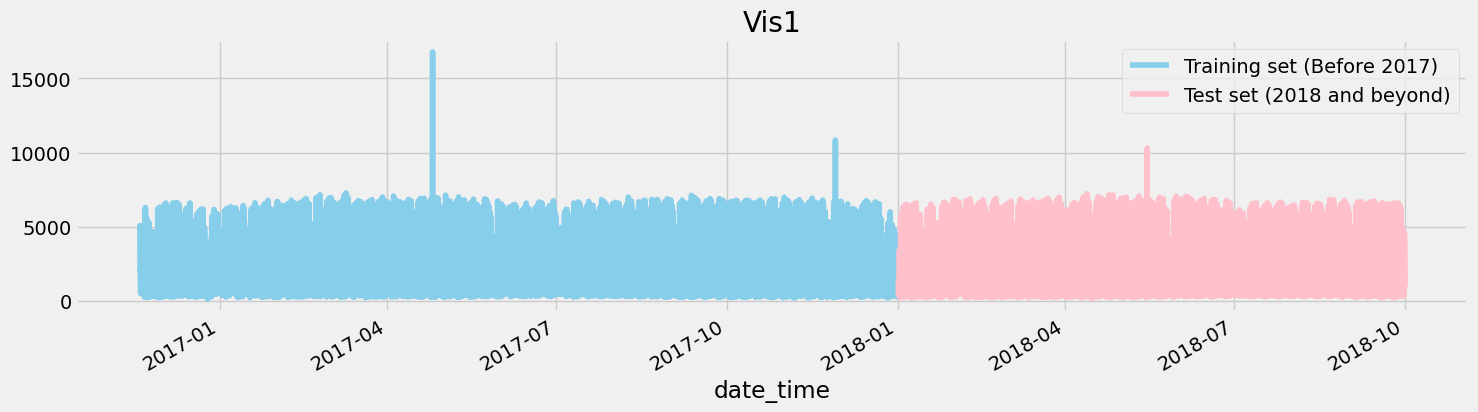

In [128]:
data["traffic_volume"][:'2017'].plot(figsize=(16,4),legend=True, color= 'skyblue')
data["traffic_volume"]['2018':].plot(figsize=(16,4),legend=True, color = 'pink')
plt.legend(['Training set (Before 2017)','Test set (2018 and beyond)'])
plt.title('Vis1')
plt.show()

## Feature Scaling

Apply feature scaling to the data if needed.

**Instructions:**
- Use a scaling method such as MinMaxScaler or StandardScaler.
- Ensure scaling is applied correctly to both training and testing data.

In [129]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
train_data = scaler.fit_transform(train_data)
test_data = scaler.transform(test_data)

In [130]:
n_past = 60

# Prepare sequences for RNN
X_train, y_train = [], []
for i in range(n_past, len(train_data)):
    X_train.append(train_data[i - n_past:i, 0])
    y_train.append(train_data[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

# Similarly prepare sequences for the test set
X_test, y_test = [], []
for i in range(n_past, len(test_data)):
    X_test.append(test_data[i - n_past:i, 0])
    y_test.append(test_data[i, 0])
X_test, y_test = np.array(X_test), np.array(y_test)

In [131]:
X_train.shape

(11981, 60)

In [132]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

## Models Selection

Choose two models for time series forecasting.

**Instructions:**
- Select two models such as ARIMA, SARIMA, RNN, LSTM, or GRU.
- Train these models and then compare their performance.

In [133]:
#RNN
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, LSTM, Dropout, GRU

RNN_model = Sequential()

RNN_model.add(SimpleRNN(units=50, return_sequences = True, input_shape = (X_train.shape[1],1)))
RNN_model.add(Dropout(0.2))

RNN_model.add(SimpleRNN(units=50, return_sequences = True))
RNN_model.add(Dropout(0.2))

RNN_model.add(SimpleRNN(units=50))
RNN_model.add(Dropout(0.2))

RNN_model.add(Dense(units = 1))
RNN_model.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_3 (SimpleRNN)             │ (None, 60, 50)              │           2,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 60, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_4 (SimpleRNN)             │ (None, 60, 50)              │           5,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 60, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_5 (SimpleRNN)             │ (None, 50)                  │           5,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,751 (49.81 KB)

 Trainable params: 12,751 (49.81 KB)

 Non-trainable params: 0 (0.00 B)

In [134]:
RNN_model.compile(loss = 'mean_squared_error', optimizer = 'adam')


### Model 1 Training

Train your first model on the training dataset.

**Instructions:**
- Fit the first model to the training data.
- Ensure to monitor the training process.

In [135]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
# Defining our callbacks
checkpoints = ModelCheckpoint(filepath = 'my_weights.keras', save_best_only = True)
# Defining our early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

# Training our RNN model
RNN_model.fit(X_train, y_train,
          validation_data=(X_test,y_test),
          epochs=100,
          batch_size=32,
          verbose=1,
          callbacks= [checkpoints, early_stopping])

Epoch 1/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 25s 55ms/step - loss: 0.0000e+00 - val_loss: 0.3323
Epoch 2/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 21s 57ms/step - loss: 0.0000e+00 - val_loss: 0.3323
Epoch 3/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 20s 53ms/step - loss: 0.0000e+00 - val_loss: 0.3323
Epoch 4/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 22s 58ms/step - loss: 0.0000e+00 - val_loss: 0.3323
Epoch 5/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 41s 58ms/step - loss: 0.0000e+00 - val_loss: 0.3323
Epoch 6/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 21s 55ms/step - loss: 0.0000e+00 - val_loss: 0.3323
Epoch 7/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 42s 58ms/step - loss: 0.0000e+00 - val_loss: 0.3323
Epoch 8/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 41s 57ms/step - loss: 0.0000e+00 - val_loss: 0.3323
Epoch 9/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 40s 54ms/step - loss: 0.0000e+00 - val_loss: 0.3323
Epoch 10/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 22s 58ms/step - loss: 0.0000e+00 - val_loss: 0.3323
Epoch 11/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 41s 58ms/step - loss: 0.000

### Make 1 Predictions

Generate predictions on the test dataset.

### Instructions:
- Use the trained model to make predictions on the test data.
- Store the predictions for further analysis.

In [136]:
train_predict=RNN_model.predict(X_train)
test_predict=RNN_model.predict(X_test)

375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step
247/247 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step


In [137]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

### Model 1 Evaluation

Evaluate the performance of your first model on the test dataset.

**Instructions:**
- Calculate evaluation metrics such as MAE, MSE, RMSE, or MAPE.
- Plot the predicted vs actual values for the test set.
- Plot the loss and the validation loss.

In [138]:
import math
from sklearn.metrics import mean_squared_error

print(math.sqrt(mean_squared_error(y_train,train_predict)))

print(math.sqrt(mean_squared_error(y_test,test_predict)))

0.0
0.576436031934268


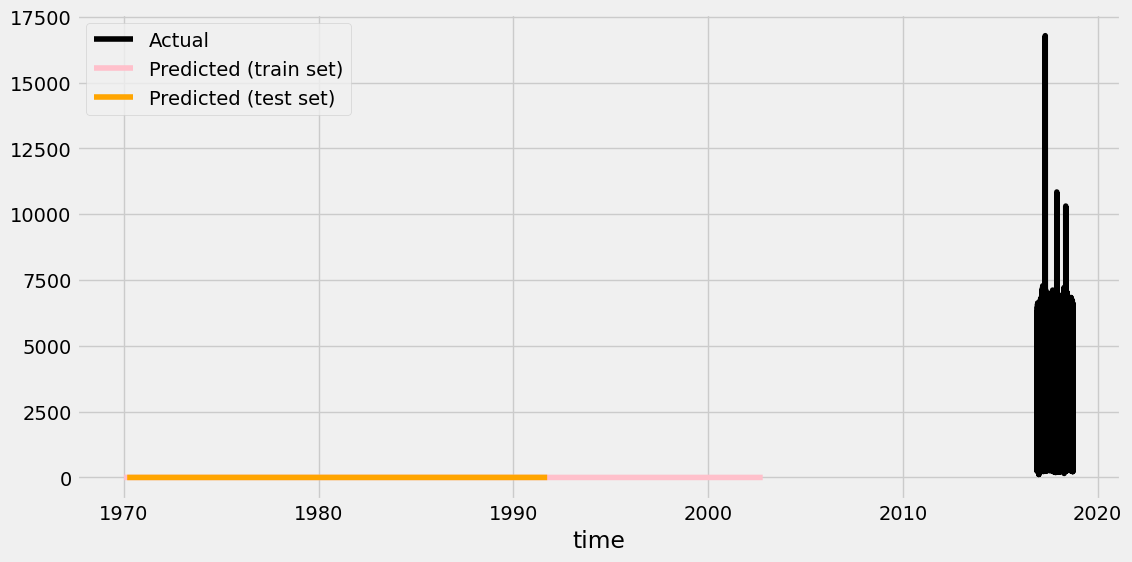

In [139]:
look_back = 1

trainPredictPlot = np.empty_like(train_data)
trainPredictPlot[:] = np.nan

trainPredictPlot[look_back:len(train_predict)+look_back] = train_predict.flatten().reshape(-1,1)

testPredictPlot = np.empty_like(test_data)
testPredictPlot[:] = np.nan

test_start = len(test_data) - len(test_predict)

testPredictPlot[test_start:] = test_predict.flatten().reshape(-1,1)

original_scaled_data = data["traffic_volume"][:]


plt.figure(figsize=(12, 6))
plt.plot(original_scaled_data, color='black', label=f"Actual")
plt.plot(trainPredictPlot, color='pink', label=f"Predicted (train set)")
plt.plot(testPredictPlot, color='orange', label=f"Predicted (test set)")

plt.title(f"")
plt.xlabel("time")
plt.ylabel(f"")
plt.legend()
plt.show()

### Model 2 Training

Train your second model on the training dataset.

**Instructions:**
- Fit the second model to the training data.
- Ensure to monitor the training process.

In [140]:
# The LSTM architecture
regressor = Sequential()

regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units=1))

regressor.compile(optimizer='rmsprop',loss='mean_squared_error')

regressor.fit(X_train,y_train,epochs=10,batch_size=32)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 54s 125ms/step - loss: 0.0000e+00
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 49s 131ms/step - loss: 0.0000e+00
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 47s 126ms/step - loss: 0.0000e+00
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 82s 127ms/step - loss: 0.0000e+00
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 48s 129ms/step - loss: 0.0000e+00
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 81s 125ms/step - loss: 0.0000e+00
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 49s 130ms/step - loss: 0.0000e+00
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 47s 126ms/step - loss: 0.0000e+00
Epoch 9/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 83s 130ms/step - loss: 0.0000e+00
Epoch 10/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 82s 131ms/step - loss: 0.0000e+00


### Make 2 Predictions

Generate predictions on the test dataset.

### Instructions:
- Use the trained model to make predictions on the test data.
- Store the predictions for further analysis.

In [141]:
train_predict=regressor.predict(X_train)
test_predict=regressor.predict(X_test)

375/375 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step
247/247 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step


In [142]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

### Model 2 Evaluation

Evaluate the performance of your second model on the test dataset.

**Instructions:**
- Calculate evaluation metrics such as MAE, MSE, RMSE, or MAPE.
- Plot the predicted vs actual values for the test set.
- Plot the loss and the validation loss.

In [143]:
print(math.sqrt(mean_squared_error(y_train,train_predict)))

print(math.sqrt(mean_squared_error(y_test,test_predict)))

0.0
0.6624003335660885


In [144]:
#GRU
from keras.optimizers import SGD

regressorGRU = Sequential()

regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))

regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))

regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))

regressorGRU.add(GRU(units=50, activation='tanh'))
regressorGRU.add(Dropout(0.2))

regressorGRU.add(Dense(units=1))

regressorGRU.compile(optimizer=SGD(learning_rate=0.01, decay=1e-7, momentum=0.9, nesterov=False),loss='mean_squared_error')

regressorGRU.fit(X_train,y_train,epochs=10,batch_size=150)

Epoch 1/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 31s 312ms/step - loss: 0.0000e+00
Epoch 2/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 26s 322ms/step - loss: 0.0000e+00
Epoch 3/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 41s 317ms/step - loss: 0.0000e+00
Epoch 4/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 41s 309ms/step - loss: 0.0000e+00
Epoch 5/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 41s 310ms/step - loss: 0.0000e+00
Epoch 6/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 42s 318ms/step - loss: 0.0000e+00
Epoch 7/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 41s 319ms/step - loss: 0.0000e+00
Epoch 8/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 41s 321ms/step - loss: 0.0000e+00
Epoch 9/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 26s 322ms/step - loss: 0.0000e+00
Epoch 10/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 25s 315ms/step - loss: 0.0000e+00


## Project Questions:

1. **Data Preprocessing**: Explain why you chose your specific data preprocessing techniques (e.g., normalization, handling missing values). How did these techniques help prepare the data for training the model?
2. **Feature Engineering**: Did you perform any feature engineering or transformations? Describe your decisions and how these new features (or transformed features) contributed to the forecasting model.
3. **Model Architecture**: Describe the reasoning behind your model’s architecture (e.g., the type of model, layers, number of neurons, and activation functions). Why did you believe this architecture was appropriate for time series forecasting?
4. **Training Process**: Discuss why you chose your batch size, number of epochs, and optimizer. How did these choices affect the training process? Did you experiment with different values, and what were the outcomes?
5. **Loss Function and Metrics**: Why did you choose the specific loss function and evaluation metrics (e.g., MAE, RMSE, MAPE)? How do they align with the objective of forecasting?
6. **Model Tuning (If Done)**: Describe any tuning you performed (e.g., hyperparameter tuning) and why you felt it was necessary. How did these adjustments improve model performance?
7. **Overfitting and Underfitting**: Analyze whether the model encountered any overfitting or underfitting during training. What strategies could you implement to mitigate these issues?
8. **Future Improvements**: Suggest potential improvements or further steps you could take to enhance model performance. Consider using different algorithms, feature engineering techniques, or tuning hyperparameters.

### Answer Here:

I downloaded the dataset to my laptop and then copied its path,

I also reduced the number of epochs so that the program runs quickly.